# Random Forest Classifier

## Jacob Baldwin

## Brief decision tree recap

### Learn to split a dataset based on impurity 

<table><tr>
<td><img src="img/DTImpurityCurves.png"></td>
<td><img src="img/decision-trees.png" alt="Drawing" style="width: 600px;"></td>
</tr></table>

### Hunt's algorithm, entropy

## Ensemble Methods

### Combine classifiers

<img src="img/Ensemble.png">

### Improved results

Variance, bias, prediction

## Ensemble Methods (cont.)

### Homogeneous vs. Heterogeneous

### Sequential vs. Parallel
<table><tr>
<td><img src="img/Parallel+Ensemble+Methods.jpg" alt="Drawing" style="width: 600px;"></td>
<td><img src="img/Sequential+Ensemble+Methods.jpg" alt="Drawing" style="width: 600px;"></td>
</tr></table>

## On to Random Forest!


### Combination of Decision Trees

### Bagging

Averaging predictions, subsample training data

### Feature Split

If there are $p$ features, typically $\sqrt{p}$ features are selected as candidates for each new tree

## Bagging vs Random Forest

### Decrease variance, increase bias

### Trees are less correlated

### Out-of-bag error

The error of the classifier using only the predictions from trees without the datapoint in their training set

<img src="img/RF.png">

## Applications

### Almost all classification benchmarks

### Credit card default, cancer diagnosis, finance sector

### Great baseline, hard to overfit

## Example Time

In [1]:
import pandas as pd
all_star_totals = pd.read_pickle('data/all_star_totals_df.pkl')
mvp_totals = pd.read_pickle('data/mvp_totals_df.pkl')
# because the all_star_df includes the unlabeled mvps, we need to 
# merge the two to get the correct labels
data_df = mvp_totals.merge(all_star_totals, #on=['Player', 'Season'], 
                           how='right', indicator=True)
data_df['label'] = data_df['_merge'].map({'both': 1, 'right_only': 0})  # 0 is regular all-star, 1 is mvp
data_df.dropna(inplace=True)  # handle a couple na rows from the data source
data_df.loc[:10, ['Player', 'Season', 'Tm', 'PTS', '3PA', 'label']]

,Player,Season,Tm,PTS,3PA,label
0,Michael Jordan,1987-88,CHI,2868,53,1
1,Michael Jordan,1995-96,CHI,2491,260,1
2,LeBron James,2008-09,CLE,2304,384,1
3,Michael Jordan,1990-91,CHI,2580,93,1
4,LeBron James,2012-13,MIA,2036,254,1
5,Kevin Durant,2013-14,OKC,2593,491,1
6,Shaquille O'Neal,1999-00,LAL,2344,1,1
7,LeBron James,2009-10,CLE,2258,387,1
8,Kevin Garnett,2003-04,MIN,1987,43,1
9,Stephen Curry,2015-16,GSW,2375,886,1


## Feature selection

In [2]:
features = ['WS', 'AST', 'STL', 'BLK', 'TOV', 'FGA', '3PA', '3P', 'FG%', 'eFG%', 'FT%', 'TS%']

In [3]:
# split the data into training and testing portions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
np.random.seed(0)
train_df, test_df, train_label, test_label = train_test_split(data_df[features].astype(float), data_df['label'],
                                                              train_size=0.7, stratify=data_df['label'])
def train_test_dt():
    mvp_dt_classifier = DecisionTreeClassifier(criterion='entropy')
    mvp_dt_classifier.fit(train_df, train_label)
    return mvp_dt_classifier.score(test_df, test_label)
    
train_test_dt()

0.9431438127090301

## Is this good?

In [4]:
# balance the labels
mvp_bool = data_df['label'] == 1
number_mvp = np.sum(mvp_bool)
accuracy_list = []
for i in range(0, 10):
    all_star_df = data_df[~mvp_bool].sample(number_mvp)
    mvp_df = data_df[mvp_bool]
    new_data_df = pd.concat((mvp_df, all_star_df), ignore_index=True)
    train_df, test_df, train_label, test_label = train_test_split(new_data_df[features].astype(float), new_data_df['label'],
                                                              train_size=0.7, stratify=new_data_df['label'])
    accuracy = train_test_dt()
    accuracy_list.append(accuracy)
    
print(np.mean(accuracy_list))

0.8416666666666668


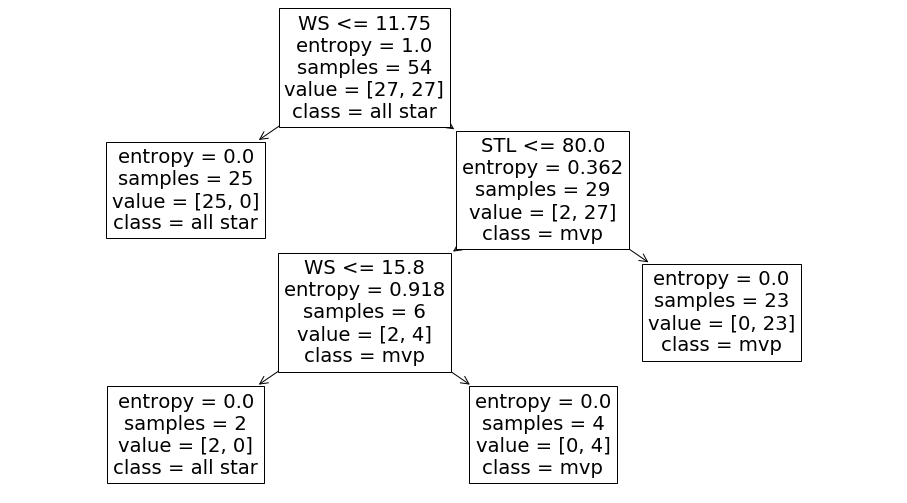

In [6]:
# Visualize
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(train_df, train_label)
plt.figure(figsize=(16,9))
out = plot_tree(dt, feature_names=features, class_names=['all star', 'mvp'])

In [7]:
from sklearn.ensemble import RandomForestClassifier
def train_test_rf():
    mvp_rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
    mvp_rf_classifier.fit(train_df, train_label)
    return mvp_rf_classifier.score(test_df, test_label)

accuracy_list = []
for i in range(0, 10):
    all_star_df = data_df[~mvp_bool].sample(number_mvp)
    mvp_df = data_df[mvp_bool]
    new_data_df = pd.concat((mvp_df, all_star_df), ignore_index=True)
    train_df, test_df, train_label, test_label = train_test_split(new_data_df[features].astype(float), new_data_df['label'],
                                                              train_size=0.7, stratify=new_data_df['label'])
    accuracy = train_test_rf()
    accuracy_list.append(accuracy)
    
print(np.mean(accuracy_list))

0.8666666666666666


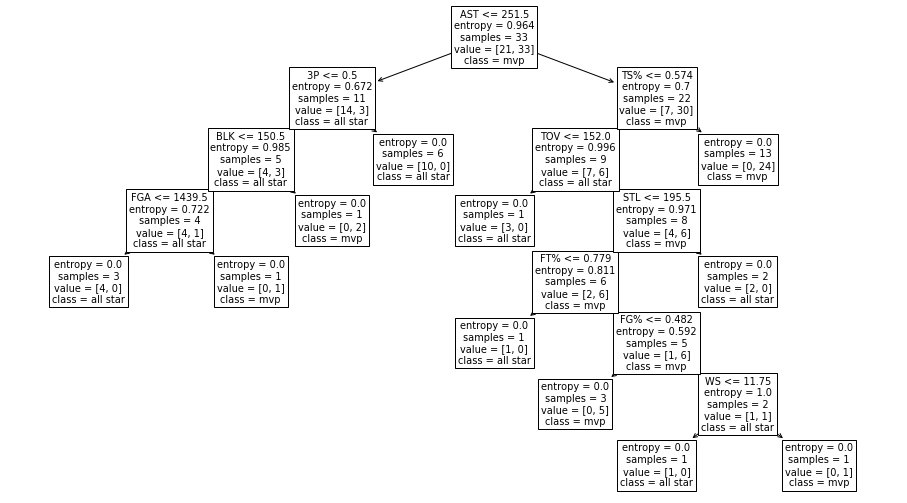

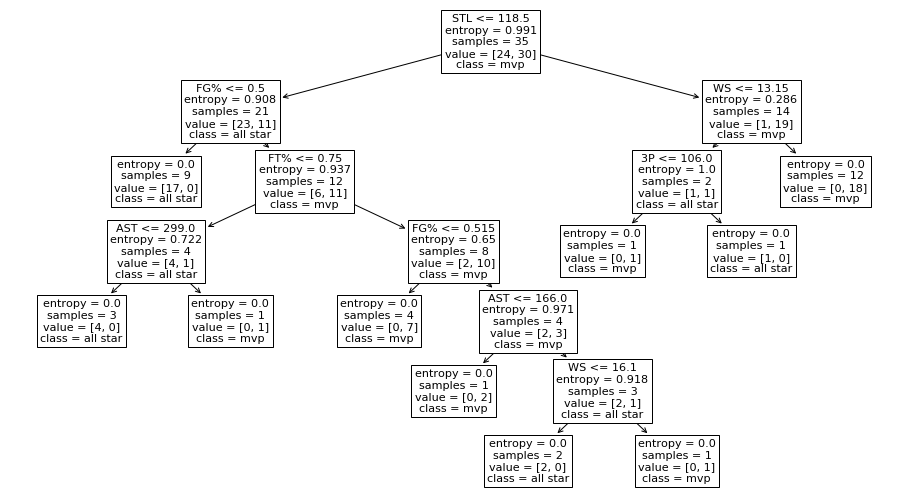

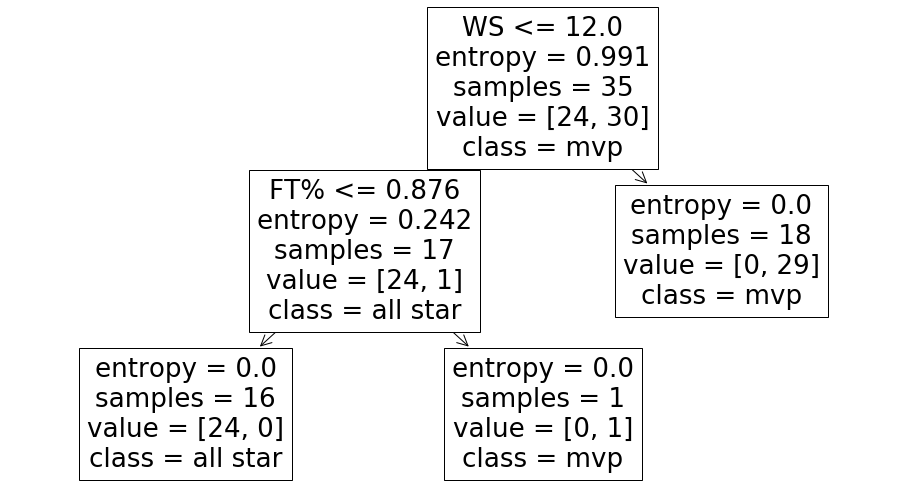

In [8]:
# Visualize
import matplotlib.pyplot as plt
mvp_rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
mvp_rf_classifier.fit(train_df, train_label)
for i, tree_in_forest in enumerate(mvp_rf_classifier.estimators_):
    if i >= 3:
        break
    plt.figure(figsize=(16,9))
    out = plot_tree(tree_in_forest, feature_names=features, class_names=['all star', 'mvp'])

## Conclusion

The benefit of Random Forest over Decision Tree is larger with more data

Random Forest is an excellent baseline algorithm

## Links

[Basketball Reference](https://www.basketball-reference.com)

[Repo](https://github.com/baldwinj30/rf-mvp)